In [2]:
import numpy as np
np.nan +10

nan

In [3]:
10 + np.nan

nan

In [6]:
import pandas as pd

X = [1,2,3,4,5]
Y = [3,4,5,6,7]

test = pd.DataFrame([X,Y]).T

In [8]:
test[0].corr(test[1], method='pearson')

0.9999999999999999

In [1]:
import pandas as pd

In [4]:
results = pd.read_json('results/final_corr.json')

In [174]:
results.sort_values(by='Corr', ascending=True)

,Date_Range,Rate_Limit,doc_count,Corr
164,5,0.05,171,0.294314
154,3,0.05,167,0.317506
169,6,0.05,172,0.332717
149,2,0.05,168,0.342592
159,4,0.05,172,0.344628
...,...,...,...,...
30,-24,0.01,171,0.690005
0,-30,0.01,170,0.690759
1,-30,0.02,169,0.692918
10,-28,0.01,169,0.697230


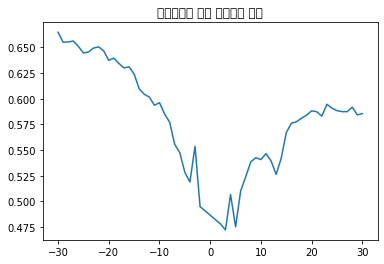

In [85]:
plt.plot(results.groupby('Date_Range').mean()['Corr'])
plt.rc('font', family='HYHWPEQ')
plt.title('날짜변화에 따른 상관계수 변화')
plt.xlabel = '날짜'
plt.ylabel = '상관계수'
plt.show()

In [99]:
!cd ..

In [105]:
from ngram import ngram
ng = ngram()
# ng.search('dictionary')
# ng.file_list

,Date_Range,Rate_Limit,doc_count,Corr
15,-27,0.01,170,0.699461
10,-28,0.01,169,0.697230
1,-30,0.02,169,0.692918
0,-30,0.01,170,0.690759
30,-24,0.01,171,0.690005
...,...,...,...,...
159,4,0.05,172,0.344628
149,2,0.05,168,0.342592
169,6,0.05,172,0.332717
154,3,0.05,167,0.317506


In [33]:
# list(hawkish.dropna())

In [35]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import copy

test_data = pd.read_json('test_ngram_datas.json')
test_data['ngram'] = list(map(lambda i : i.split(','), test_data['ngram']))
test_data['date'] = list(map(lambda i : i.date(), test_data['date']))
test_data = test_data[test_data['date'] <= datetime.date(2017,12,31)]

In [41]:
sr_df = pd.read_json('standard_rate.json').set_index('date')

In [113]:
def tone_sent(x):
    a = 0
    b = 0
    for ngram in x:
        if ngram in hawkish:
            a += 1
        elif ngram in dovish:
            b += 1
    # if a+b < ngram_limit:
    #     return np.nan
    try:
        return (a-b) / (a+b)
    except:
        return np.nan

In [179]:
results[results['Date_Range']==28]#.sort_values(by='Corr',)

,Date_Range,Rate_Limit,doc_count,Corr
275,28,0.01,170,0.620695
276,28,0.02,169,0.616240
277,28,0.03,170,0.592101
278,28,0.04,168,0.560140
279,28,0.05,171,0.569752


In [180]:
results.sort_values(by='Corr', ascending=False) # [results['Rate_Limit']==0.03] [results['Date_Range']>0]

,Date_Range,Rate_Limit,doc_count,Corr
15,-27,0.01,170,0.699461
10,-28,0.01,169,0.697230
1,-30,0.02,169,0.692918
0,-30,0.01,170,0.690759
30,-24,0.01,171,0.690005
...,...,...,...,...
159,4,0.05,172,0.344628
149,2,0.05,168,0.342592
169,6,0.05,172,0.332717
154,3,0.05,167,0.317506


In [181]:
k = 15

dc = results['Date_Range'][k]
rl = results['Rate_Limit'][k]
a = pd.read_json('dictionary/hawkish_dovish_{}_{}.json'.format(dc, rl))

hawkish = list(a.T[0].dropna())
dovish = list(a.T[1].dropna())

의사록 개수 :233


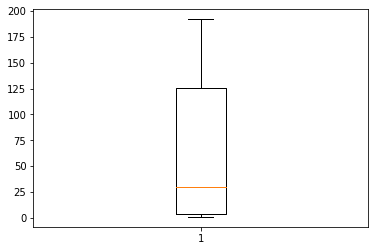

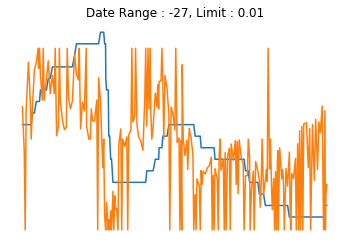

상관계수 : 0.3802
의사록 개수 :159


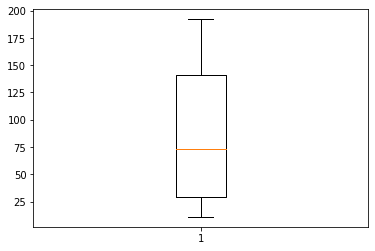

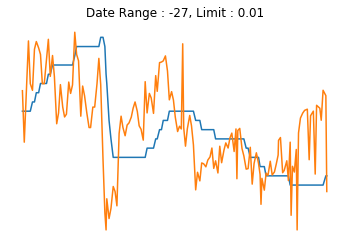

상관계수 : 0.4443


In [190]:
# Tone 계산 (문장 -> 문서)
test_data['tone'] = list(map(tone_sent, test_data['ngram']))

tone_data = copy.deepcopy(test_data.dropna())
# 0은 중립
tone_data['HD'] = list(map(lambda i : 'H' if i > 0 else 'D' if i < 0 else np.nan, tone_data['tone']))
tone_data.dropna(inplace=True)
tone_data['H'] = list(map(lambda i : 1 if i == 'H' else 0, tone_data['HD']))
tone_data['D'] = list(map(lambda i : 1 if i == 'D' else 0, tone_data['HD']))
final_tone = copy.deepcopy(tone_data.groupby('date').sum()[['H','D']])
final_tone['tone'] = (final_tone['H'] - final_tone['D']) / (final_tone['H'] + final_tone['D'])
final_tone['rate'] = sr_df['rate']
print('의사록 개수 :{}'.format(len(final_tone)))
plt.boxplot(final_tone[['H','D']].sum(axis=1))

plt.show()

final_tone['norm_rate'] = (final_tone['rate'] - final_tone['rate'].mean())/final_tone['rate'].std()
final_tone['norm_tone'] = (final_tone['tone'] - final_tone['tone'].mean())/final_tone['tone'].std()
plt.plot(final_tone['norm_rate'])
plt.plot(final_tone['norm_tone'])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Date Range : {}, Limit : {}'.format(dc, rl))
plt.axis('off')
plt.show()

# 상관분석
corr = final_tone['tone'].corr(final_tone['rate'], method = 'pearson')
print('상관계수 : {:.4f}'.format(corr))

# 이상치 제거
final_tone = final_tone[final_tone['H'] + final_tone['D'] > 10]
final_tone['tone'] = (final_tone['H'] - final_tone['D']) / (final_tone['H'] + final_tone['D'])

print('의사록 개수 :{}'.format(len(final_tone)))
plt.boxplot(final_tone[['H','D']].sum(axis=1))
plt.show()


final_tone['rate'] = sr_df['rate']

final_tone['norm_rate'] = (final_tone['rate'] - final_tone['rate'].mean())/final_tone['rate'].std()
final_tone['norm_tone'] = (final_tone['tone'] - final_tone['tone'].mean())/final_tone['tone'].std()

plt.plot(final_tone['norm_rate'])
plt.plot(final_tone['norm_tone'])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Date Range : {}, Limit : {}'.format(dc, rl))
plt.axis('off')
plt.show()

# 상관분석
corr = final_tone['tone'].corr(final_tone['rate'], method = 'pearson')
print('상관계수 : {:.4f}'.format(corr))

In [192]:
print(len(hawkish))
print(len(dovish))


8571
7897


In [132]:
# 상관분석
corr = final_tone['tone'].corr(final_tone['rate'], method = 'pearson')
print('상관계수 : {:.2f}'.format(corr))

상관계수 : 0.71


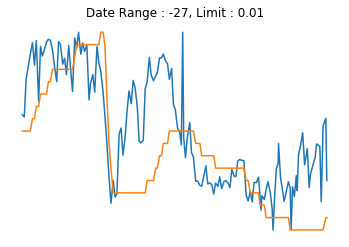

In [122]:
#Scaler
# MaxAbsScaler RobustScaler StandardScaler MinMaxScaler
import pandas as pd
from sklearn import preprocessing
x = final_tone['rate'].values.reshape(-1, 1) #returns a numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
final_tone['rate'] = x_scaled

x = final_tone['tone'].values.reshape(-1, 1) #returns a numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
final_tone['tone'] = x_scaled

plt.plot(final_tone['tone'])
plt.plot(final_tone['rate'])
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.title('Date Range : {}, Limit : {}'.format(dc, rl))
plt.axis('off')
plt.show()

In [74]:
final_tone

,H,D,tone,rate
date,,,,
2005-05-12,14,10,0.583333,0.5000
2005-06-09,8,6,0.571429,0.5000
2005-07-07,16,5,0.761905,0.5000
2005-08-11,15,3,0.833333,0.5000
2005-09-08,16,2,0.888889,0.5000
...,...,...,...,...
2017-08-31,62,85,0.421769,0.0000
2017-09-21,3,18,0.142857,0.0000
2017-10-19,85,77,0.524691,0.0000


In [186]:
# ※파일 위치 지정
train_data = pd.read_json('final_ngram_comma.json')
train_data['date'] = list(map(lambda i : i.date(), train_data['date']))
train_data.set_index('date', inplace=True)
# 학습 기간 설정
train_data = train_data.iloc[(train_data.index >= datetime.date(2005,5,1)) & 
                            (train_data.index <= datetime.date(2017,12,31))]
# 클래스 사용 위해 데이터 분리
train_data['ngram'] = list(map(lambda i : i.split(','), train_data['ngram']))

In [187]:
import BOK
train_data['ud'] = BOK.rate_label(call_datas, 28, 0.03)['ud']

nbc = BOK.NBC()
nbc.add_data(train_data)
nbc.bagging(train_data, 30)
nbc.df = nbc.df[nbc.df[[1,0,-1]].sum(axis=1) > 15] # 빈도 수 15개 미만 NGRAM 자르기

hawkish = nbc.df[nbc.df['score'] >= 1.3].index
dovish = nbc.df[nbc.df['score'] <= 10/13].index

In [184]:
call_datas = pd.read_json('rate_data/call_raw.json')#.set_index('date')

In [185]:
call_datas

,rate
2005-03-29,3.24
2005-03-30,3.25
2005-03-31,3.26
2005-04-01,3.25
2005-04-02,3.25
...,...
2020-07-25,0.48
2020-07-26,0.48
2020-07-27,0.49
2020-07-28,0.47
